# **MÓDULO 27 - Projeto de Doenças Cardiovasculares - Regressão Logística**


Assim como na aula que trabalhamos com uma base de dados nova, com um contexto de modelo de propensão a compra de carros, para a atividade de vocês achei interessante trazer também novos desafios.

Nessa tarefa iremos construir um modelo que nos ajude a prever doenças cardiovasculares, a base contém dados reais.

age - idade dos pacientes

gender - genero (2 mulheres) (1 homens)

height - altura dos pacientes

weight - peso dos pacientes

gluc - glicose

smoke - fumante (1) não fumante (0)

alco - consume alcool (1) não consome (0)

active - realiza atividades fisicas (1) não realiza (0)

cardio_disease - tem doença cardio (1) não tem (0) - Variável target


Seu objetivo é utilizar esses dados históricos dos pacientes e construir um bom modelo de regressão capaz de indicar se novos pacientes estão propensos a doenças cariovasculares ou não.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

# 1) Comece carregando e tratando a base de dados.
Assim como na aula essa nova base não passou por pré processamento nenhum então nessa etapa, carrega os dados, verifique os tipos de dados, verifique se temos dados faltantes e outliers.
Quando necessário realize o tratamento.


In [2]:
base = pd.read_csv("/content/CARDIO_BASE.csv", delimiter=';')

In [4]:
base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,2,168,62,1,1,0,0,1,0
1,55,1,156,85,3,1,0,0,1,1
2,52,1,165,64,3,1,0,0,0,1
3,48,2,169,82,1,1,0,0,1,1
4,48,1,156,56,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,56,1,166,65,1,1,0,0,0,0
9996,50,1,160,93,2,1,0,0,1,1
9997,40,1,158,66,2,2,0,0,1,0
9998,50,1,168,70,3,1,0,0,1,1


In [5]:
base['gender'] = base['gender'].replace({1:0})
base['gender'] = base['gender'].replace({2:1})
base.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,1,168,62,1,1,0,0,1,0
1,55,0,156,85,3,1,0,0,1,1
2,52,0,165,64,3,1,0,0,0,1
3,48,1,169,82,1,1,0,0,1,1
4,48,0,156,56,1,1,0,0,0,0


In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  int64 
 1   gender          10000 non-null  int64 
 2   height          10000 non-null  int64 
 3   weight          10000 non-null  object
 4   cholesterol     10000 non-null  int64 
 5   gluc            10000 non-null  int64 
 6   smoke           10000 non-null  int64 
 7   alco            10000 non-null  int64 
 8   active          10000 non-null  int64 
 9   cardio_disease  10000 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 781.4+ KB


In [14]:
base['weight'] = base['weight'].str.replace(',','.', regex = False)


In [15]:
base['weight'] = base['weight'].astype(float)

In [16]:
base.head()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
0,50,1,168,62.0,1,1,0,0,1,0
1,55,0,156,85.0,3,1,0,0,1,1
2,52,0,165,64.0,3,1,0,0,0,1
3,48,1,169,82.0,1,1,0,0,1,1
4,48,0,156,56.0,1,1,0,0,0,0


In [17]:
base.describe()

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.288300,0.345400,164.308200,74.303710,1.365000,1.222200,0.089000,0.053700,0.797200,0.503100
std,6.796234,0.475522,8.178796,14.566353,0.677658,0.565561,0.284758,0.225436,0.402105,0.500015
min,30.000000,0.000000,70.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,0.000000,165.000000,72.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,1.000000,170.000000,82.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,1.000000,250.000000,200.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# 2) Agora é hora de explorar os dados com uma análise bem completa.
Plote pelo menos 3 gráficos analisando o comportamento da variável cardio com outras variaveis da sua preferência (análise bivariada). Não se esqueça de trazer insights acerca do analisado.


Text(0, 0.5, 'Quantidade')

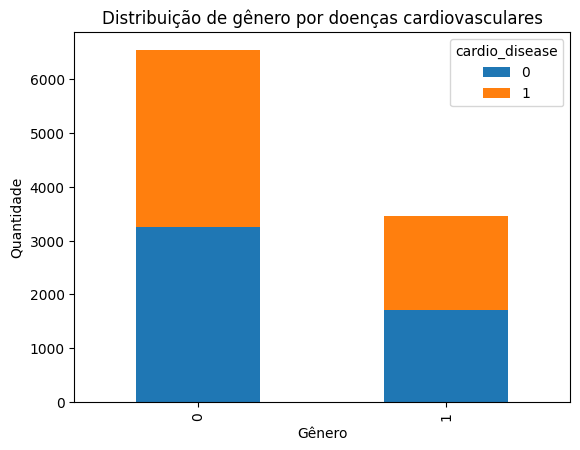

In [32]:
contagem = pd.crosstab(base['gender'], base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de gênero por doenças cardiovasculares')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')



Podemos ver que a quantidade de homens e mulheres com ou sem doenças cardiovasculares são bem distribuida, existe a possibilidade de que genero não influencie o desenvolvimento dessa doença mas não podemos descartar essa possibilidade

Text(0, 0.5, 'Quantidade')

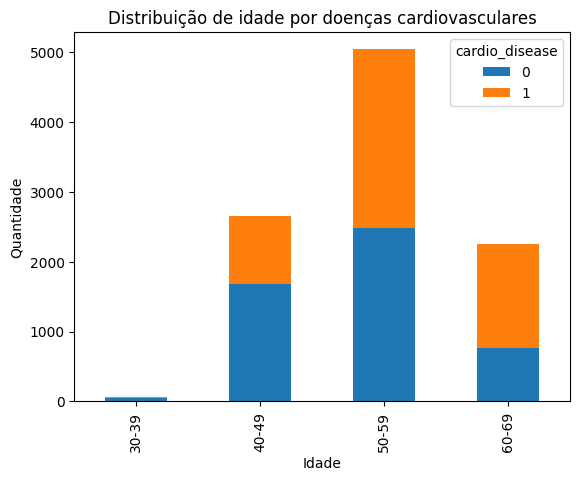

In [30]:
contagem = pd.crosstab(base['gender'], base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de gênero por doenças cardiovasculares')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
bins = [30,40,50,60,70]
labels = ['30-39', '40-49', '50-59', '60-69']
faixa_idade = pd.cut(base['age'], bins=bins, labels=labels, right=False)


contagem = pd.crosstab(faixa_idade, base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de idade por doenças cardiovasculares')
plt.xlabel('Idade')
plt.ylabel('Quantidade')

Aqui podemos ver que quanto mais velho mais chances de ter uma doença cardiovascular

Text(0, 0.5, 'Quantidade')

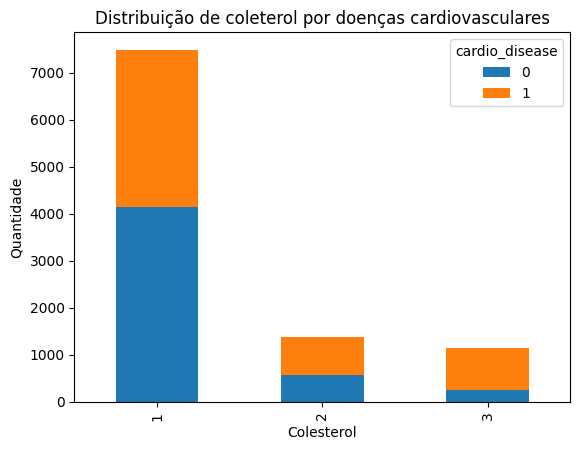

In [35]:
contagem = pd.crosstab(base['cholesterol'], base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de coleterol por doenças cardiovasculares')
plt.xlabel('Colesterol')
plt.ylabel('Quantidade')


Nesse gráfico podemos ver que conforme o nivel do colesterol aumenta maiores são as chances de se ter uma doença cardiovascular

Text(0, 0.5, 'Quantidade')

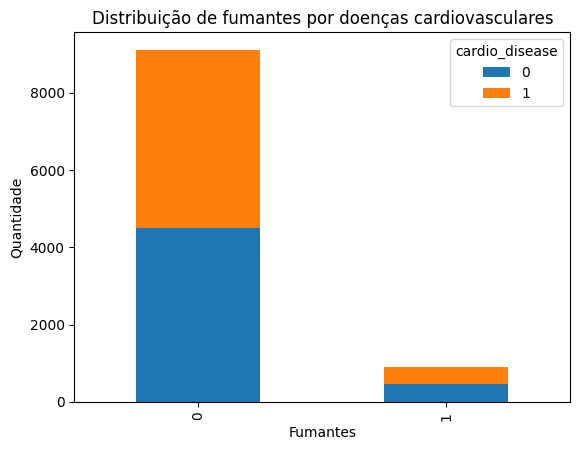

In [36]:
contagem = pd.crosstab(base['smoke'], base['cardio_disease'])
contagem.plot(kind='bar', stacked=True)
plt.title('Distribuição de fumantes por doenças cardiovasculares')
plt.xlabel('Fumantes')
plt.ylabel('Quantidade')

É o mesmo caso do genero, os dados parecem bem distribuido em relação a quem desenvolve esse tipo de doença sendo fumante ou não fumante mas a quantidade de dados de individuos fumantes é bem menor

# 3) Nessa etapa você deve trazer a matriz de correlação e apontar insights acerca das variáveis com um relacionamento mais forte entre si.



In [41]:
base

,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio_disease,age_group
0,50,1,168,62.0,1,1,0,0,1,0,50-59
1,55,0,156,85.0,3,1,0,0,1,1,50-59
2,52,0,165,64.0,3,1,0,0,0,1,50-59
3,48,1,169,82.0,1,1,0,0,1,1,40-49
4,48,0,156,56.0,1,1,0,0,0,0,40-49
...,...,...,...,...,...,...,...,...,...,...,...
9995,56,0,166,65.0,1,1,0,0,0,0,50-59
9996,50,0,160,93.0,2,1,0,0,1,1,50-59
9997,40,0,158,66.0,2,2,0,0,1,0,40-49
9998,50,0,168,70.0,3,1,0,0,1,1,50-59


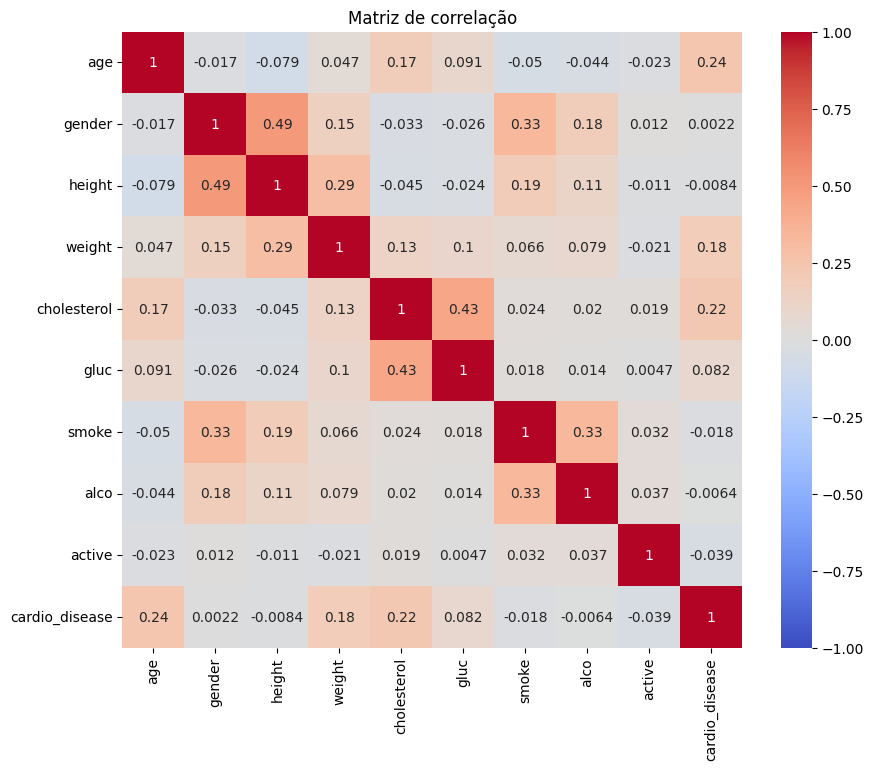

In [44]:
correlacao = base.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlação')
plt.show()

Irei falar apenas das que apresentam uma correlação maior que 0,3:

49% Altura e genero são as que estão mais correlacionadas, o que faz sentido ja que a média de altura masculina costuma ser maior que a feminina.

43% A glicose e o coleterol aparentam uma correlção de 43%

33% O fato do individuo fumar tem uma correlação de 33% tanto com o fato de ele beber quanto com a sua idade

# 4) Essa é a sua última etapa pré modelo. Você deve:

A) Separar a base em treino e teste.

B) Você considera que essa base precisa que os dados sejam padronizados? Se sim, porque? Se acredita que devem, então realize essa etapa.

C) Verifique se os dados estão balanceados, se não, faça o balanceamento.


D) Visualize as bases de treino, teste (X E Y) e verifique se está tudo adequado.

In [47]:
X = base.drop('cardio_disease', axis=1)
Y = base['cardio_disease']

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Features com valores maiores podem dominar a função, tornando-o enviesado. A padronização serve para deixa-lo mais equilibrado

In [49]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
base['cardio_disease'].value_counts()

,count
cardio_disease,
1,5031
0,4969


In [52]:
smote = SMOTE(random_state=42)
X_train_bl, Y_train_bl = smote.fit_resample(X_train, Y_train)

In [53]:
X_train_bl

array([[ 0.10037973, -0.73138185, -1.25610705, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-0.19393504,  1.36727483,  0.08809078, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [ 1.4247962 , -0.73138185, -0.27850863, ..., -0.31328402,
        -0.24037742, -1.96927621],
       ...,
       [ 0.98332404,  1.36727483,  0.65429181, ..., -0.31328402,
        -0.24037742,  0.50780078],
       [-1.92199261,  1.36727483,  1.88967284, ...,  3.19199173,
        -0.24037742,  0.50780078],
       [-1.07687935, -0.73138185,  0.84528083, ..., -0.31328402,
        -0.24037742,  0.50780078]])

In [54]:
Y_train_bl

,cardio_disease
0,0
1,0
2,1
3,1
4,0
...,...
8059,0
8060,0
8061,0
8062,0


In [57]:
print('X_train_bl:', X_train_bl.shape)
print('Y_train:_bl', Y_train_bl.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train_bl: (8064, 9)
Y_train:_bl (8064,)
X_test: (2000, 9)
Y_test: (2000,)


# 5) Realize a etapa de treinamento do modelo:

A) Faça o treinamento do modelo.

B) Traga o intercept e os coeficientes.

c) Avalie as métricas do modelo treinado

D) Justifique se te parece que o modelo tem feito boas previsões ou não.

In [58]:
logistica = LogisticRegression(random_state=0)
logistica.fit(X_train_bl, Y_train_bl)


LogisticRegression(random_state=0)

In [60]:
print('Intercept', logistica.intercept_)
print('Coeficientes', logistica.coef_)

Intercept [0.01480453]
Coeficientes [[ 0.44145949  0.00862079 -0.07862564  0.35096437  0.4081836  -0.07356343
  -0.02782602 -0.00872331 -0.07136147]]


In [63]:
previsoes = logistica.predict(X_train_bl)

In [64]:
relatorio = classification_report(Y_train_bl, previsoes)
print(relatorio)

              precision    recall  f1-score   support

           0       0.63      0.66      0.64      4032
           1       0.64      0.61      0.62      4032

    accuracy                           0.64      8064
   macro avg       0.64      0.64      0.63      8064
weighted avg       0.64      0.64      0.63      8064



O modelo tá razoável, mas não é excelente, o ideal seria maior que 80, porem não está tão ruim pois não ta na casa dos 50. Apesar disso o modelo parece ser realistico, pois doenças cardiacas são influenciadas por mais fatores, como por exemplo pré disposição genética então é compreensivel essas métricas

# 6) Teste seu modelo!

A) Aplique o modelo aos dados de teste.

B) Avalie as métricas do modelo treinado

C) Plote o gráfico da curva AUC-ROC e explique o que consegue analisar através do gráfico.

In [65]:
teste = logistica.predict(X_test)

In [66]:
relatorio = classification_report(Y_test, teste)
print(relatorio)

              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1001
           1       0.67      0.61      0.64       999

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



o modelo acertou 65% das vezes que previu 0 e 67% das vezes que previu 1, são resultados consistentes. Acertou 70% de 0 e 61% de 1, isso significa que ele foi melhor em preber o 0, apesar de não ser uma diferença muito alta isso ja indica um ponto de atenção. O F1 foi de aproximadamente 65%-66%, o que é um percentual de previsões razoavel, mas pode melhorar, levando em conta que ainda não vimos métodos mais avançados e que doenças cardio vasculares não são influenciadas apenas por fatores externos.

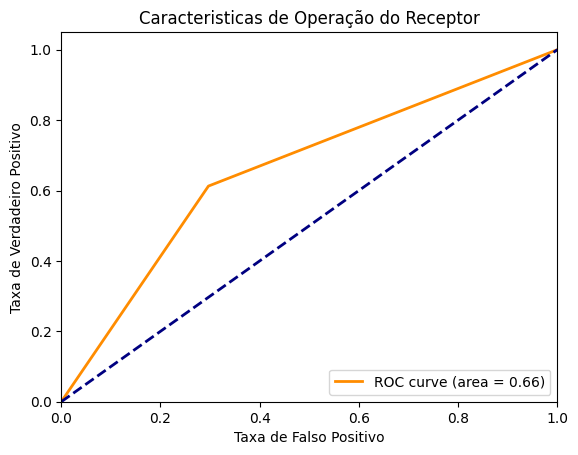

<Figure size 640x480 with 0 Axes>

In [68]:
fpr, tpr, thresholds = roc_curve(Y_test, teste)
roc_auc = roc_auc_score(Y_test, teste)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Caracteristicas de Operação do Receptor')
plt.legend(loc="lower right")
plt.show()


A curva de ROC apresenta uma area AUC de 66 em relação a linha de referencia, o indica que modelo é razoavel

# 7) Explique:

A) Explique com suas palavras regressão logistica.

B) Explique porque a regressão logistica é um modelo de classificação.

C) Explique quais pontos em comum a regressão logistica tem da regressão linear.



A. Regressão logistica é um algoritmo usado para resolver problemas de classificação binaria, usando probabilidade, com base nas variaveis que tem influencia

B.A Regressão Logística é um modelo de classificação porque o objetivo dela não é prever um valor numérico contínuo, mas sim classificar resultados binarios (sim ou não, doente ou saudavel, potencial devedor ou não)

C. Regressão logística e regressão linear tem em comum equações lineares, coeficientes interpretáveis e dependem de dados organizados. A principal diferença é que um prevê valores contínuos, e a outra prevê probabilidades de classificação binária.